In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
sns.set()

In [2]:
data = pd.read_csv("3.01. Country clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


**Map the data**

In [3]:
data_mapped = data.copy()
data_mapped["Language"] = data_mapped["Language"].map({
    "English": 0,
    "French": 1,
    "German": 2
})

**Select the features**

In [13]:
x = data_mapped.iloc[:, 1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


**Clustering**

In [32]:
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                n_init=10)
kmeans.fit(x)

KMeans(n_clusters=3, n_init=10)

**Clustering results**

In [28]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

c:\Users\Juan Pablo\Desktop\python-scripts\data-science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, 0, 0, 2])

In [29]:
data_with_clusters = data_mapped.copy()
data_with_clusters["Clusters"] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,2


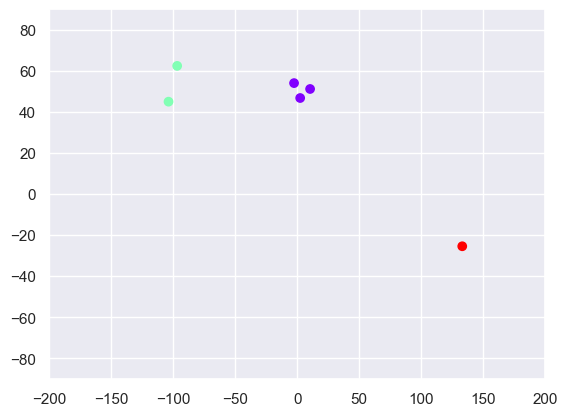

In [30]:
plt.scatter(data["Longitude"], data["Latitude"], c=data_with_clusters["Clusters"], cmap='rainbow')
plt.xlim(-200, 200)
plt.ylim(-90, 90)
plt.show()

**Seleccionando el número de clusters**

WCSS

In [22]:
kmeans.inertia_

13208.958119999996

In [25]:
wcss = list()
for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x)    
    wcss.append(kmeans.inertia_)
wcss

c:\Users\Juan Pablo\Desktop\python-scripts\data-science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Juan Pablo\Desktop\python-scripts\data-science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Juan Pablo\Desktop\python-scripts\data-science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Juan Pablo\Desktop\python-scripts\data-science\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

**Método del Codo**

Text(0, 0.5, 'Within-cluster sum of squares')

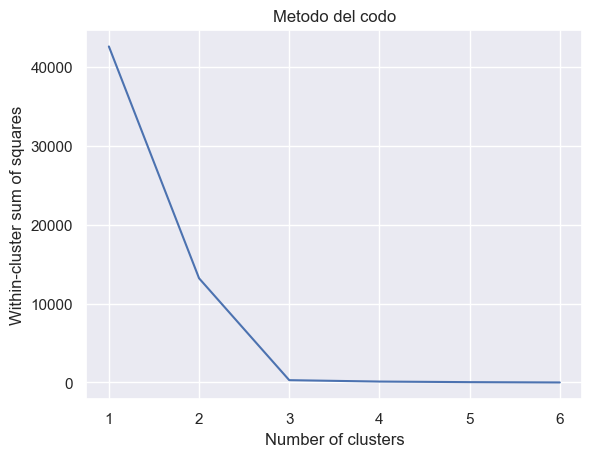

In [26]:
number_clusters = range(1, 7)
plt.plot(number_clusters, wcss)
plt.title("Metodo del codo")
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')